In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

df = pd.read_csv('creditcard.csv')

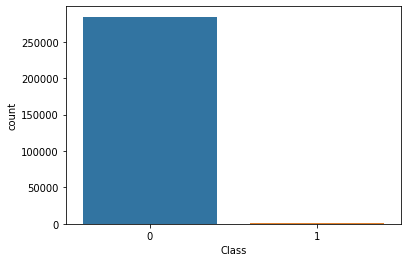

In [2]:
# import seaborn as sns

sns.countplot(x='Class', data=df)
# plt.legend()
plt.show()

Only 492 transactions are marked as fraud from a total of 284,807 transactions. We will use several undersampling methods to create a balanced dataset. We will then use the balanced dataset to train classifiers and compare the performance of the classifiers.

## Training on Imbalanced Dataset

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,accuracy_score
from sklearn.decomposition import PCA

def evaluate(df):
    X = df.drop('Class', axis=1)
    y = df['Class']
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)
    #Calculate the recall score for logistic Regression on Skewed data
    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    # cm = confusion_matrix(y_test, y_pred)
    # print(cm)
    return accuracy_score(y_test, y_pred), recall_score(y_test,y_pred)
    

# def plot_decision_boundary(X, y):
#     # Convert to two dimensions using pca
#     pca = PCA(n_components=2)
#     X_new = pca.fit_transform(X)
#     fraud = X_new[y==1]
#     non_fraud = X_new[y==0]
#     # Plot the decision boundary
#     plt.figure(figsize=(10,6))
#     plt.scatter(fraud[:,0], fraud[:,1], color='red', label='Fraud')
#     plt.scatter(non_fraud[:,0], non_fraud[:,1], color='green', label='Non Fraud')
#     plt.legend()
#     plt.show()

In [4]:
accuracy, recall = evaluate(df)
print("Accuracy: ", accuracy)
print("Recall: ", recall)

Accuracy:  0.9991456292499094
Recall:  0.5986394557823129


It was able to identify only 68% of the fraud transactions as actually fraud. This is a very poor performance. We will try to improve the performance by using a balanced dataset.

# <u>Undersampling</u>

## Random Undersampling

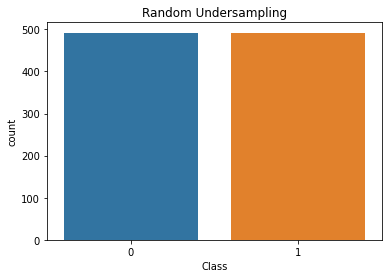

In [5]:
def random_undersampling(df):
    n_fraud = len(df[df['Class'] == 1])
    non_fraud_indices = df[df['Class'] == 0].index
    random_indices = np.random.choice(non_fraud_indices, n_fraud, replace=False)
    fraud_indices = df[df['Class'] == 1].index
    under_sample_indices = np.concatenate([fraud_indices,random_indices])
    under_sample = df.loc[under_sample_indices]
    return under_sample

random_under_sample = random_undersampling(df)
sns.countplot(x='Class', data=random_under_sample)
plt.title('Random Undersampling')
plt.show()

In [6]:
accuracy, recall = evaluate(random_under_sample)
print("Accuracy: ", accuracy)
print("Recall: ", recall)

Accuracy:  0.9425675675675675
Recall:  0.9387755102040817


We observe that recall is improved considerably. It is now able to identify 93% of the fraud transactions correctly. However, accuracy is decreased due to undersampling of the majority class. It is ok to label some non-fraud transactions as fraud, but it is not ok to label some fraud transactions as non-fraud. We will try to improve the recall by using a different undersampling method.

## Near Miss Undersampling

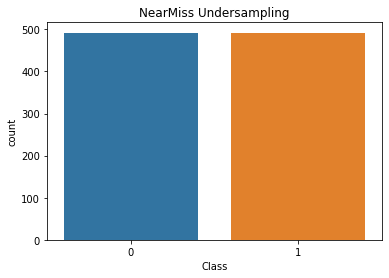

In [7]:
from imblearn.under_sampling import NearMiss

nm = NearMiss(sampling_strategy='auto', )
X_res,y_res = nm.fit_resample(df.drop('Class', axis=1), df['Class'])
nm_under_sample = pd.concat([pd.DataFrame(X_res),pd.DataFrame(y_res)],axis=1)

sns.countplot(x='Class', data=nm_under_sample)
plt.title('NearMiss Undersampling')
plt.show()

In [8]:
accuracy, recall = evaluate(nm_under_sample)
print("Accuracy: ", accuracy)
print("Recall: ", recall)

Accuracy:  0.9628378378378378
Recall:  0.9395973154362416


# Oversampling

## Random Oversampling

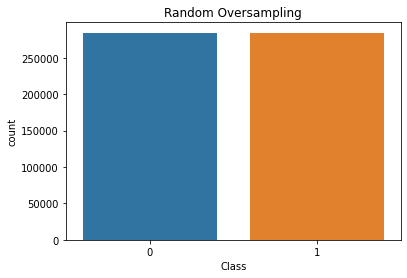

In [9]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='auto')
X_res,y_res = ros.fit_resample(df.drop('Class', axis=1), df['Class'])
ros_over_sample = pd.concat([pd.DataFrame(X_res),pd.DataFrame(y_res)],axis=1)

sns.countplot(x='Class', data=ros_over_sample)
plt.title('Random Oversampling')
plt.show()

In [10]:
accuracy, recall = evaluate(ros_over_sample)
print("Accuracy: ", accuracy)
print("Recall: ", recall)

Accuracy:  0.9386654473617877
Recall:  0.9142676516384326


## Synthetic Minority Oversampling Technique (SMOTE)

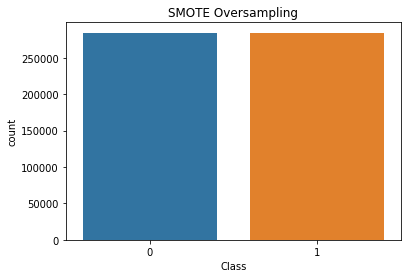

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto')
X_res,y_res = smote.fit_resample(df.drop('Class', axis=1), df['Class'])
smote_over_sample = pd.concat([pd.DataFrame(X_res),pd.DataFrame(y_res)],axis=1)

sns.countplot(x='Class', data=smote_over_sample)
plt.title('SMOTE Oversampling')
plt.show()

In [12]:
accuracy, recall = evaluate(smote_over_sample)
print("Accuracy: ", accuracy)
print("Recall: ", recall)

Accuracy:  0.9720380563811266
Recall:  0.9646440404135008


## Adaptive Synthetic sampling method (ADASYN)

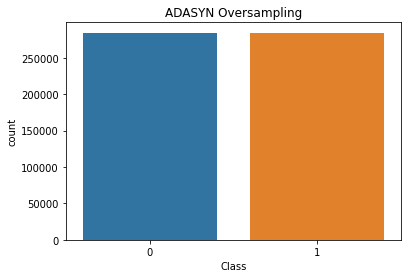

In [13]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(sampling_strategy='auto')
X_res,y_res = adasyn.fit_resample(df.drop('Class', axis=1), df['Class'])
adasyn_over_sample = pd.concat([pd.DataFrame(X_res),pd.DataFrame(y_res)],axis=1)

sns.countplot(x='Class', data=adasyn_over_sample)
plt.title('ADASYN Oversampling')
plt.show()


In [14]:
accuracy, recall = evaluate(adasyn_over_sample)
print("Accuracy: ", accuracy)
print("Recall: ", recall)

Accuracy:  0.9575458425174694
Recall:  0.948406055000761
